In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./data/AAPL_data.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df["daily_change_price"] = df["close"]- df["open"]

In [5]:
df.head()

,date,open,high,low,close,volume,Name,daily_change_price
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [6]:
df['daily_price_perct']=((df['close']-df['open'])/df['close'])*100

In [7]:
df.head()

,date,open,high,low,close,volume,Name,daily_change_price,daily_price_perct
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


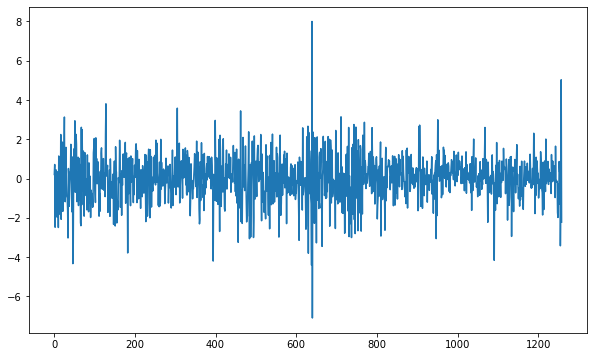

In [9]:
plt.figure(figsize=(10,6))
df['daily_price_perct'].plot()
plt.savefig("./images/price_perct")

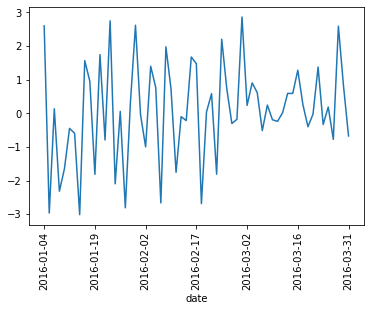

In [10]:
df.set_index('date')['2016-01-01':'2016-03-31']['daily_price_perct'].plot()
plt.xticks(rotation='vertical')
plt.savefig("./images/date.png")

In [15]:
df2=df.copy()

In [17]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_change_price    float64
daily_price_perct     float64
dtype: object

In [18]:
df2['date']=pd.to_datetime(df2['date'])

In [19]:
df2.set_index('date',inplace=True)

In [20]:
df2.head()

,open,high,low,close,volume,Name,daily_change_price,daily_price_perct
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [21]:
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

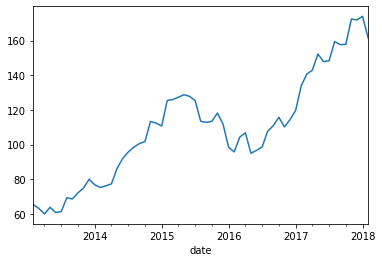

In [23]:
df2['close'].resample('M').mean().plot()
plt.savefig("./images/mean-month")

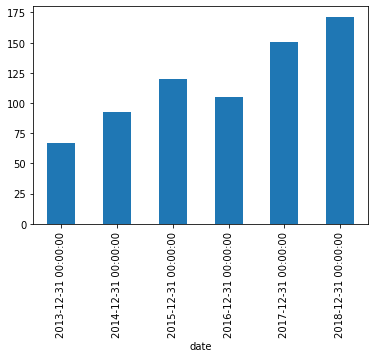

In [26]:
df2['close'].resample('Y').mean().plot(kind = 'bar')
plt.savefig("./images/mean-year")